In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import mean_squared_error
import os
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


#os.chdir("C:/Users/Common/Desktop/Google Drive/NUS/Semester 2/BT5153-Applied Machine Learning/Group Project/From Microsoft Team/Dataset")

In [2]:
df=pd.read_csv("listings_selected.csv",index_col="id")

In [3]:
df.head()

,scrape_id,last_scraped,picture_url,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
49091,20190318042744,43542,https://a0.muscache.com/im/pictures/24485541/6...,f,Woodlands,North Region,1.44255,103.79580,Apartment,Private room,...,1,94.0,10.0,10.0,10.0,10.0,8.0,8.0,flexible,0.02
50646,20190318042744,43542,https://a0.muscache.com/im/pictures/36342984/6...,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,...,18,91.0,9.0,10.0,10.0,10.0,9.0,9.0,moderate,0.30
56334,20190318042744,43542,https://a0.muscache.com/im/pictures/20783922/1...,f,Woodlands,North Region,1.44246,103.79667,Apartment,Private room,...,20,98.0,10.0,10.0,10.0,10.0,8.0,9.0,flexible,0.21
71609,20190318042744,43542,https://a0.muscache.com/im/pictures/24453191/3...,f,Tampines,East Region,1.34541,103.95712,Villa,Private room,...,12,80.0,8.0,8.0,9.0,9.0,8.0,8.0,moderate,0.14
71896,20190318042744,43542,https://a0.muscache.com/im/pictures/2440674/ac...,f,Tampines,East Region,1.34567,103.95963,House,Private room,...,20,80.0,8.0,8.0,9.0,9.0,8.0,8.0,moderate,0.22


In [903]:
df.shape

(71949, 31)

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44025 entries, 0 to 44024
Data columns (total 43 columns):
picture_url                                        44025 non-null object
accommodates                                       44025 non-null int64
bathrooms                                          44025 non-null float64
bedrooms                                           44025 non-null float64
beds                                               44025 non-null float64
price                                              44025 non-null float64
security_deposit                                   44025 non-null float64
cleaning_fee                                       44025 non-null float64
guests_included                                    44025 non-null int64
availability_30                                    44025 non-null int64
review_scores_rating                               44025 non-null float64
reviews_per_month                                  44025 non-null float64
num_amenit

In [904]:
df.isnull().sum()

scrape_id                           0
last_scraped                        0
picture_url                         0
host_is_superhost                  96
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          52
bedrooms                           31
beds                              151
bed_type                            0
amenities                           0
price                               0
security_deposit                21355
cleaning_fee                    19595
guests_included                     0
availability_30                     0
number_of_reviews                   0
review_scores_rating            27512
review_scores_accuracy          27559
review_scores_cleanliness       27535
review_scores_checkin           27599
review_score

# 1. Keep only Review Score rating, drop all other review scores

In [905]:
df_1=df.drop(['review_scores_accuracy', 'review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication',
         'review_scores_location','review_scores_value'], axis=1)

In [906]:
df_1.shape

(71949, 25)

In [907]:
df_1.isnull().sum()

scrape_id                           0
last_scraped                        0
picture_url                         0
host_is_superhost                  96
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          52
bedrooms                           31
beds                              151
bed_type                            0
amenities                           0
price                               0
security_deposit                21355
cleaning_fee                    19595
guests_included                     0
availability_30                     0
number_of_reviews                   0
review_scores_rating            27512
cancellation_policy                 0
reviews_per_month               26226
dtype: int64

# 2. Deal with null cell

**2.1 drop missing rows for review score is missing**

In [908]:
df_2=df_1.dropna(subset=['review_scores_rating'])

In [909]:
df_2.shape

(44437, 25)

In [910]:
df_2.isnull().sum()

scrape_id                           0
last_scraped                        0
picture_url                         0
host_is_superhost                  87
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          18
bedrooms                            2
beds                               44
bed_type                            0
amenities                           0
price                               0
security_deposit                11135
cleaning_fee                    10127
guests_included                     0
availability_30                     0
number_of_reviews                   0
review_scores_rating                0
cancellation_policy                 0
reviews_per_month                  13
dtype: int64

**2.2 Other variable**

[(0.0, 600.0)]

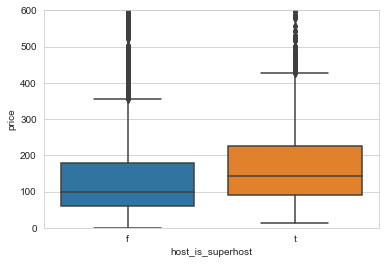

In [911]:
import seaborn as sns
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="host_is_superhost", y="price", data=df_2)
ax.set(ylim=(0, 600))

**Super host price distribution is higher than non-super host => consider to put all missing value as default = false**

In [912]:
df_2[['host_is_superhost']] = df_2[['host_is_superhost']].fillna(value='f')

C:\Users\ivyde\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [913]:
df_2.host_is_superhost.value_counts()

f    35401
t     9036
Name: host_is_superhost, dtype: int64

**Bathroom - remove outlier based on 3sigma - replace outlier and empty value with mean**

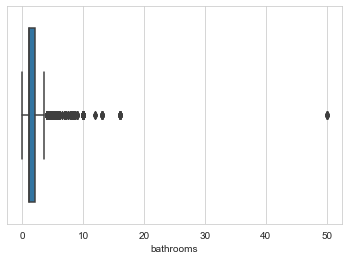

In [914]:
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="bathrooms", data=df_2)
#ax.set(xlim=(0, 5))

In [915]:
#3 sigma place at 99.7%
df_2.bathrooms.describe([0.997])

count    44419.000000
mean         1.587676
std          1.338650
min          0.000000
50%          1.000000
99.7%        8.500000
max         50.000000
Name: bathrooms, dtype: float64

In [916]:
df_2['bathrooms']=df_2.bathrooms.where(df_2.bathrooms<=8.5, other=np.nan)

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [917]:
df_2.bathrooms.describe()

count    44319.000000
mean         1.557955
std          1.070656
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.500000
Name: bathrooms, dtype: float64

In [918]:
df_2['bathrooms']=df_2.bathrooms.fillna(df_2.bathrooms.median())

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [919]:
df_2.bathrooms.describe()

count    44437.000000
mean         1.556473
std          1.069619
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.500000
Name: bathrooms, dtype: float64

In [920]:
# def remove_outlier(x,outlier):
#     value=x
#     if x>outlier:
#         x=np.nan
#     else:
#         x=value

In [921]:
# df_3.loc[:,"bathrooms"] = df_3.bathrooms.apply(lambda x : remove_outlier(x))

**Bedroom - remove outlier based on 3sigma - replace outlier and empty value with mean**

In [922]:
df_2.bedrooms.describe([0.997])

count    44435.000000
mean         1.303725
std          1.119467
min          0.000000
50%          1.000000
99.7%        6.000000
max         50.000000
Name: bedrooms, dtype: float64

In [923]:
df_2['bedrooms']=df_2.bedrooms.where(df_2.bedrooms<=6, other=np.nan)
df_2['bedrooms']=df_2.bedrooms.fillna(df_2.bedrooms.median())

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [924]:
df_2.bedrooms.describe()

count    44437.000000
mean         1.286631
std          0.872977
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: bedrooms, dtype: float64

**Bed - seems no outlier, replace null with median**

In [925]:
df_2.beds.describe([0.997])

count    44393.000000
mean         2.130246
std          2.533889
min          0.000000
50%          1.000000
99.7%       18.000000
max         36.000000
Name: beds, dtype: float64

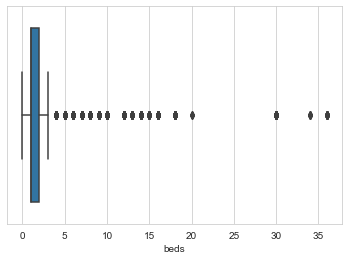

In [926]:
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="beds", data=df_2)
#ax.set(xlim=(0, 5))

In [927]:
df_2['beds']=df_2.beds.fillna(df_2.beds.median())

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Security deposit**

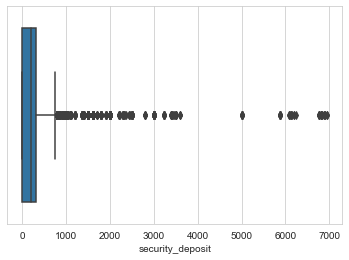

In [928]:
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="security_deposit", data=df_2)
# ax.set(xlim=(0, 2500))

In [929]:
df_2.security_deposit.describe([0.99])

count    33302.000000
mean       233.061137
std        358.083818
min          0.000000
50%        190.000000
99%       1388.900000
max       6944.000000
Name: security_deposit, dtype: float64

In [930]:
df_2['security_deposit'].fillna(0, inplace = True) 

C:\Users\ivyde\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [931]:
df_2['security_deposit']=df_2.security_deposit.where(df_2.security_deposit<1389, other=np.nan)
df_2['security_deposit']=df_2.security_deposit.fillna(df_2.security_deposit.median())

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**cleaning fee**

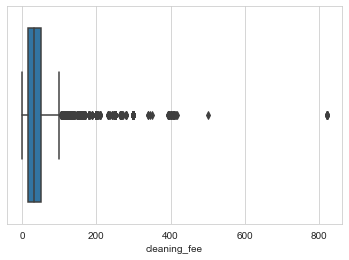

In [932]:
sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="cleaning_fee", data=df_2)
# ax.set(xlim=(0, 2500))

In [933]:
df_2.cleaning_fee.describe([0.99])

count    34310.000000
mean        37.719819
std         38.410563
min          0.000000
50%         30.000000
99%        150.000000
max        822.000000
Name: cleaning_fee, dtype: float64

In [934]:
df_2['cleaning_fee'].fillna(0, inplace = True) 

C:\Users\ivyde\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [935]:
df_2['cleaning_fee']=df_2.cleaning_fee.where(df_2.cleaning_fee<=150, other=np.nan)
df_2['cleaning_fee']=df_2.cleaning_fee.fillna(df_2.cleaning_fee.median())

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**review per month - if is null, treated as no review - replace with 0**

In [936]:
df_2['reviews_per_month']=df_2.reviews_per_month.fillna(0)

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [937]:
df_2.isnull().sum()

scrape_id                       0
last_scraped                    0
picture_url                     0
host_is_superhost               0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
availability_30                 0
number_of_reviews               0
review_scores_rating            0
cancellation_policy             0
reviews_per_month               0
dtype: int64

# 3. Other variables

**3.1 convert scrap id to date**

In [938]:
#df_3=df_2.drop(['picture_url'], axis=1)

In [939]:
df_3=df_2.copy()

In [940]:
df_3.scrape_id.value_counts()

2.019060e+13    5010
2.019080e+13    5004
2.019070e+13    4985
2.019110e+13    4978
2.019100e+13    4956
2.019050e+13    4942
2.019090e+13    4903
2.019040e+13    4877
2.019030e+13    4781
2.019032e+13       1
Name: scrape_id, dtype: int64

In [941]:
df_3['month']=round(df_3.scrape_id/100000000).astype(int)

In [942]:
df_3['month'].value_counts()

201906    5010
201908    5004
201907    4985
201911    4978
201910    4956
201905    4942
201909    4903
201904    4877
201903    4782
Name: month, dtype: int64

In [943]:
from datetime import datetime, timedelta
df_3['month']=pd.to_datetime(df_3['month'],format='%Y%m')

In [944]:
df_3['month'].value_counts()

2019-06-01    5010
2019-08-01    5004
2019-07-01    4985
2019-11-01    4978
2019-10-01    4956
2019-05-01    4942
2019-09-01    4903
2019-04-01    4877
2019-03-01    4782
Name: month, dtype: int64

In [945]:
df_3=df_3.drop(['scrape_id'], axis=1)
df_3=df_3.drop(['last_scraped'], axis=1)

In [946]:
df_3.head()

,picture_url,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,security_deposit,cleaning_fee,guests_included,availability_30,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,month
id,,,,,,,,,,,,,,,,,,,,,
49091,https://a0.muscache.com/im/pictures/24485541/6...,f,Woodlands,North Region,1.44255,103.79580,Apartment,Private room,1,1.0,...,81,0.0,0.0,1,30,1,94.0,flexible,0.02,2019-03-01
50646,https://a0.muscache.com/im/pictures/36342984/6...,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,...,80,0.0,0.0,2,30,18,91.0,moderate,0.30,2019-03-01
56334,https://a0.muscache.com/im/pictures/20783922/1...,f,Woodlands,North Region,1.44246,103.79667,Apartment,Private room,1,1.0,...,68,0.0,0.0,1,30,20,98.0,flexible,0.21,2019-03-01
71609,https://a0.muscache.com/im/pictures/24453191/3...,f,Tampines,East Region,1.34541,103.95712,Villa,Private room,6,1.0,...,200,271.0,54.0,4,27,12,80.0,moderate,0.14,2019-03-01
71896,https://a0.muscache.com/im/pictures/2440674/ac...,f,Tampines,East Region,1.34567,103.95963,House,Private room,3,0.5,...,92,135.0,27.0,1,27,20,80.0,moderate,0.22,2019-03-01


**property_type - Keep Apartment, House, Hostel, Condominium, Serviced apartment, all others  labels as Others**

In [947]:
df_3['property_type'].value_counts()

Apartment             20743
Condominium            9525
Serviced apartment     4565
House                  2799
Hostel                 2072
Townhouse               955
Loft                    847
Boutique hotel          590
Hotel                   580
Bed and breakfast       505
Bungalow                355
Other                   271
Guest suite             156
Guesthouse              122
Tent                    101
Villa                    95
Aparthotel               70
Boat                     36
Campsite                 27
Cabin                     9
Cottage                   7
Bus                       5
Camper/RV                 1
Tiny house                1
Name: property_type, dtype: int64

In [948]:
df_3['property_type']=df_2.property_type.where(((df_2.property_type=='Apartment')|(df_2.property_type=='Condominium')
                                              |(df_2.property_type=='Serviced apartment')
                                               |(df_2.property_type=='House')
                                               |(df_2.property_type=='Hostel')), other='others')

In [949]:
df_3['property_type'].value_counts()

Apartment             20743
Condominium            9525
others                 4733
Serviced apartment     4565
House                  2799
Hostel                 2072
Name: property_type, dtype: int64

# Convert 'amenities' column from string to list (to obtain length and ave amenity length)

In [950]:
remove_results = ['translation missing enhostingamenity49','translation missing enhostingamenity50']
df_3['amenities'] = df_3['amenities'].apply(lambda x: list(set(x.split(','))- set(['"translation missing: en.hosting_amenity_49"','"translation missing: en.hosting_amenity_50"'])))

In [951]:
import string
table = str.maketrans('', '', string.punctuation)

In [952]:
df_3['amenities'] = df_3['amenities'].apply(lambda x: [row.translate(table) for row in x])

In [953]:
df_3['num_amenities'] = df_3['amenities'].apply(len)

In [954]:
df_3.groupby('property_type')['num_amenities'].mean()
df_3.groupby('property_type')['num_amenities'].describe() #.unstack()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,20743.0,22.551415,9.778087,1.0,15.0,21.0,28.0,73.0
Condominium,9525.0,26.219003,10.221842,2.0,18.0,25.0,32.0,70.0
Hostel,2072.0,16.498069,6.490196,1.0,11.0,17.0,21.0,40.0
House,2799.0,18.477671,9.193775,1.0,12.0,17.0,23.0,70.0
Serviced apartment,4565.0,27.303834,9.090662,6.0,21.0,25.0,32.0,59.0
others,4733.0,20.111768,9.015154,1.0,14.0,18.0,25.0,64.0


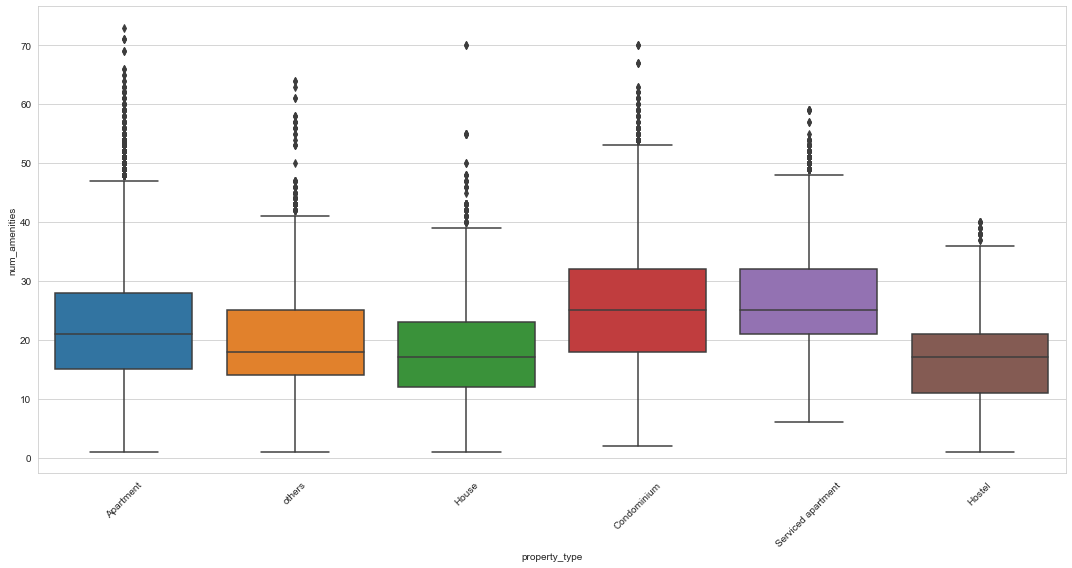

In [955]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='property_type',y='num_amenities',data=df_3)
plt.xticks(rotation=45)
plt.tight_layout()

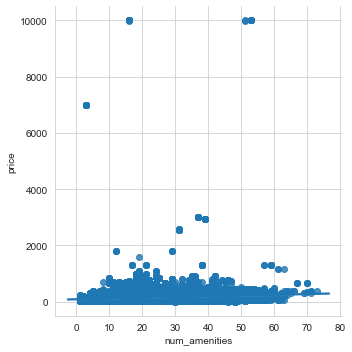

In [956]:
sns.lmplot(x='num_amenities',y='price',data=df_3)

In [957]:
# define a function that calculates the mean string length from a list of strings
def mean_string_length(list_of_strings):
    return np.mean([len(string) for string in list_of_strings])

In [958]:
df_3['amenity_length'] = df_3['amenities'].apply(mean_string_length)
df_3['amenity_length'] = df_3['amenities'].apply(lambda x: np.mean([len(item) for item in x]))
df_3.head()

,picture_url,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,cleaning_fee,guests_included,availability_30,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,month,num_amenities,amenity_length
id,,,,,,,,,,,,,,,,,,,,,
49091,https://a0.muscache.com/im/pictures/24485541/6...,f,Woodlands,North Region,1.44255,103.79580,Apartment,Private room,1,1.0,...,0.0,1,30,1,94.0,flexible,0.02,2019-03-01,9,9.111111
50646,https://a0.muscache.com/im/pictures/36342984/6...,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,...,0.0,2,30,18,91.0,moderate,0.30,2019-03-01,13,7.769231
56334,https://a0.muscache.com/im/pictures/20783922/1...,f,Woodlands,North Region,1.44246,103.79667,Apartment,Private room,1,1.0,...,0.0,1,30,20,98.0,flexible,0.21,2019-03-01,10,8.600000
71609,https://a0.muscache.com/im/pictures/24453191/3...,f,Tampines,East Region,1.34541,103.95712,others,Private room,6,1.0,...,54.0,4,27,12,80.0,moderate,0.14,2019-03-01,26,13.000000
71896,https://a0.muscache.com/im/pictures/2440674/ac...,f,Tampines,East Region,1.34567,103.95963,House,Private room,3,0.5,...,27.0,1,27,20,80.0,moderate,0.22,2019-03-01,22,11.090909


In [959]:
df_3.groupby('property_type')['amenity_length'].describe() #.unstack()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,20743.0,11.279487,2.084414,0.000000,9.956522,11.461538,12.538462,38.000000
Condominium,9525.0,11.168090,1.701309,3.000000,10.080000,11.100000,12.200000,17.051282
Hostel,2072.0,11.363978,1.874632,0.000000,10.687500,11.307692,12.245789,19.000000
House,2799.0,11.691082,2.462858,0.000000,10.500000,11.517241,12.675439,38.000000
Serviced apartment,4565.0,11.441002,1.223841,6.777778,10.590909,11.458333,12.166667,16.000000
others,4733.0,12.077541,2.533733,6.250000,10.750000,11.882353,13.000000,38.000000


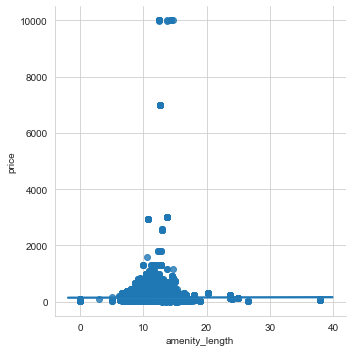

In [960]:
sns.lmplot(x='amenity_length',y='price',data=df_3)

# Drop irrelevant columns

In [961]:
df_3.columns

Index(['picture_url', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month', 'month', 'num_amenities', 'amenity_length'],
      dtype='object')

In [962]:
df_3 = df_3.drop(['neighbourhood_cleansed','latitude', 'longitude','amenities','number_of_reviews'], axis=1)

# Mark outlier for target - price

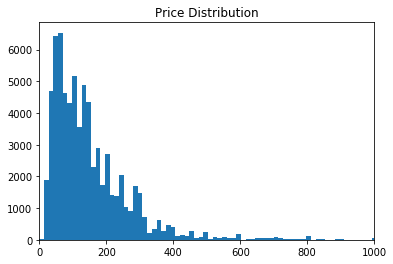

In [11]:
import matplotlib.pyplot as plt
plt.title('Price Distribution')
plt.hist(df["price"],bins=1000)
plt.xlim(0,1000)
plt.show()

In [964]:
df_3["price"].describe([0.99])

count    44437.000000
mean       149.414632
std        258.836092
min          0.000000
50%        110.000000
99%        600.000000
max      10001.000000
Name: price, dtype: float64

In [561]:
#Tag Outliers
#df_3.loc[df_3['price']>600,'price_outlier']=1
#df_3.loc[df_3['price']<=600,'price_outlier']=0

In [562]:
#df_3['price_outlier'].value_counts()

In [563]:
##For non-log transform
#y=df_3["price"]

In [965]:
df_3 = df_3[df_3['price']>0]

In [966]:
#To exclude outliers
df_3 = df_3[df_3['price']<=600]

***Do THIS to log price***

Skew is: -0.06539533185516998


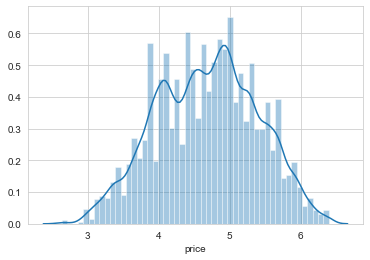

In [967]:
df_3['price'] = np.log(df_3['price'])
print ("Skew is:", df_3['price'].skew())
sns.distplot(df_3['price'])
plt.show()

# Combine with number of visitor

In [1122]:
visitor=pd.read_excel('Singapore Tourist Visit.xlsx', sheet_name = '2.0', usecols = 'A:D', skiprows = 4, skipfooter = 5)

In [1126]:
visitor.shape

(7400, 4)

In [1124]:
visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 4 columns):
Month                 7400 non-null object
Region                7400 non-null object
Place of Residence    7400 non-null object
Number of Arrivals    7400 non-null int64
dtypes: int64(1), object(3)
memory usage: 231.4+ KB


In [1123]:
visitor.head()

,Month,Region,Place of Residence,Number of Arrivals
0,Nov-19,AMERICAS,Canada,11346
1,Nov-19,AMERICAS,USA,63276
2,Nov-19,AMERICAS,Other Markets in Americas,8115
3,Nov-19,SOUTHEAST ASIA,Brunei Darussalam,6363
4,Nov-19,SOUTHEAST ASIA,Indonesia,266651


In [970]:
visitor['tot_arrival']=visitor.Month.map(visitor.groupby('Month')['Number of Arrivals'].sum())

In [971]:
visitor['Month'] = visitor['Month'].apply(lambda x : datetime.strptime(x,'%b-%y').strftime('%Y-%m-%d'))

In [972]:
visitor.head()

,Month,Region,Place of Residence,Number of Arrivals,tot_arrival
0,2019-11-01,AMERICAS,Canada,11346,1532455
1,2019-11-01,AMERICAS,USA,63276,1532455
2,2019-11-01,AMERICAS,Other Markets in Americas,8115,1532455
3,2019-11-01,SOUTHEAST ASIA,Brunei Darussalam,6363,1532455
4,2019-11-01,SOUTHEAST ASIA,Indonesia,266651,1532455


In [973]:
visitor=visitor.drop(['Region'], axis=1)
visitor=visitor.drop(['Place of Residence'], axis=1)
visitor=visitor.drop(['Number of Arrivals'], axis=1)

In [974]:
visitor=visitor.rename(columns={"Month": "month"})

In [975]:
visitor.head()

,month,tot_arrival
0,2019-11-01,1532455
1,2019-11-01,1532455
2,2019-11-01,1532455
3,2019-11-01,1532455
4,2019-11-01,1532455


In [976]:
visitor.shape

(7400, 2)

In [977]:
df_3.dtypes

picture_url                             object
host_is_superhost                       object
neighbourhood_group_cleansed            object
property_type                           object
room_type                               object
accommodates                             int64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
bed_type                                object
price                                  float64
security_deposit                       float64
cleaning_fee                           float64
guests_included                          int64
availability_30                          int64
review_scores_rating                   float64
cancellation_policy                     object
reviews_per_month                      float64
month                           datetime64[ns]
num_amenities                            int64
amenity_length                         float64
dtype: object

In [978]:
# convert datetime to string
df_3['month']=df_3['month'].astype(str)

In [979]:
# df_new=pd.merge(df_3,visitor,how='left',left_on='month' ,right_on='month')
df_new=pd.merge(df_3,visitor,how='left',on='month' )

In [980]:
df_new=df_new.drop_duplicates()

In [981]:
df_new.shape

(44025, 22)

In [982]:
df_new.head(10)

,picture_url,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,cleaning_fee,guests_included,availability_30,review_scores_rating,cancellation_policy,reviews_per_month,month,num_amenities,amenity_length,tot_arrival
0,https://a0.muscache.com/im/pictures/24485541/6...,f,North Region,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,0.0,1,30,94.0,flexible,0.02,2019-03-01,9,9.111111,1564644
51,https://a0.muscache.com/im/pictures/36342984/6...,f,Central Region,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,0.0,2,30,91.0,moderate,0.30,2019-03-01,13,7.769231,1564644
102,https://a0.muscache.com/im/pictures/20783922/1...,f,North Region,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,0.0,1,30,98.0,flexible,0.21,2019-03-01,10,8.600000,1564644
153,https://a0.muscache.com/im/pictures/24453191/3...,f,East Region,others,Private room,6,1.0,2.0,3.0,Real Bed,...,54.0,4,27,80.0,moderate,0.14,2019-03-01,26,13.000000,1564644
204,https://a0.muscache.com/im/pictures/2440674/ac...,f,East Region,House,Private room,3,0.5,1.0,1.0,Real Bed,...,27.0,1,27,80.0,moderate,0.22,2019-03-01,22,11.090909,1564644
255,https://a0.muscache.com/im/pictures/568743/7bc...,f,East Region,House,Private room,3,0.5,1.0,2.0,Real Bed,...,27.0,1,27,86.0,moderate,0.31,2019-03-01,19,10.210526,1564644
306,https://a0.muscache.com/im/pictures/24395705/d...,f,East Region,House,Private room,6,1.0,1.0,7.0,Real Bed,...,68.0,4,29,80.0,strict_14_with_grace_period,0.24,2019-03-01,20,11.350000,1564644
357,https://a0.muscache.com/im/pictures/2497358/96...,f,Central Region,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,50.0,9,16,95.0,strict_14_with_grace_period,0.16,2019-03-01,13,7.923077,1564644
408,https://a0.muscache.com/im/pictures/efe4b6be-3...,t,East Region,others,Private room,1,1.0,1.0,1.0,Real Bed,...,0.0,1,1,99.0,strict_14_with_grace_period,1.98,2019-03-01,34,12.117647,1564644
459,https://a0.muscache.com/im/pictures/8bbc4240-9...,t,East Region,others,Private room,2,1.0,1.0,2.0,Real Bed,...,0.0,1,0,99.0,strict_14_with_grace_period,2.19,2019-03-01,32,12.093750,1564644


# Feature Engineering (One-Hot Encoding)

In [983]:
list(df_new.select_dtypes(['object']).columns)

['picture_url',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'month']

In [984]:
df_new_dum = pd.get_dummies(df_new, columns=['host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'month'],drop_first = True)

In [985]:
df_new_dum.shape

(44025, 43)

In [986]:
df_new_dum.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [987]:
df_new_dum.to_csv('listings_final.csv',index=False)

# EDA

In [999]:
df_new.columns

Index(['picture_url', 'host_is_superhost', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'availability_30', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'month', 'num_amenities',
       'amenity_length', 'tot_arrival'],
      dtype='object')

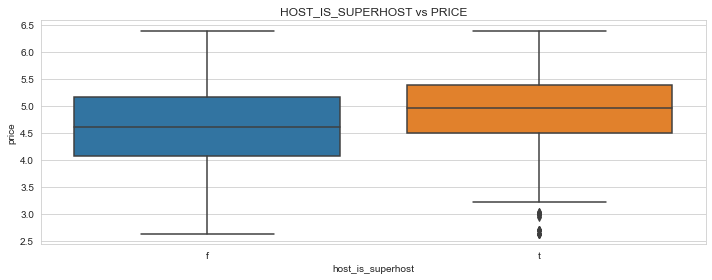

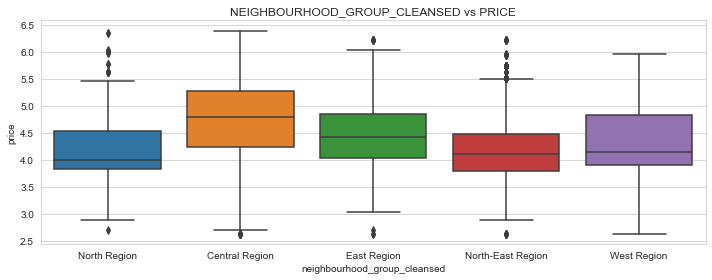

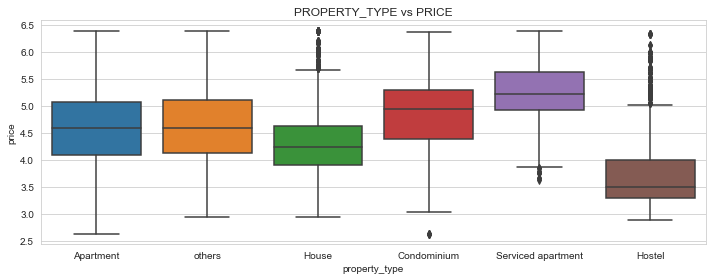

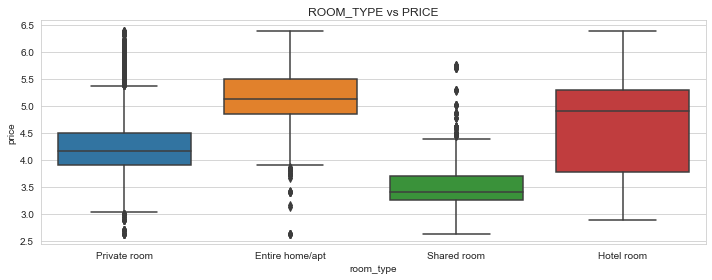

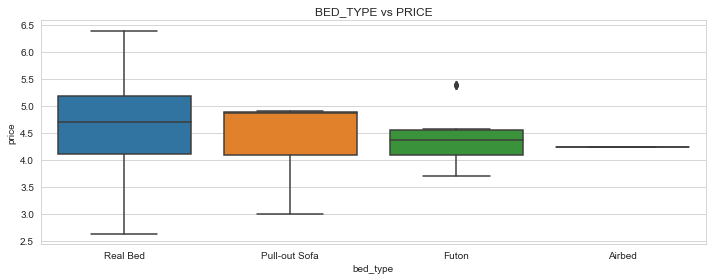

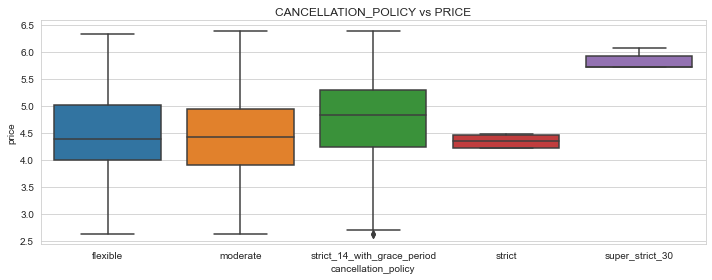

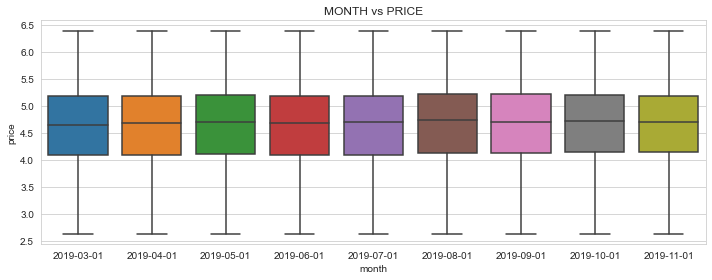

In [1167]:
cols = ['host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'month']
for col in cols:
    plt.figure(figsize=(10,4))
    ax = sns.boxplot(x=col,y='price',data=df_new)
    plt.title(str.upper(col) + ' vs PRICE')
    #plt.xticks(rotation=45)
    plt.tight_layout()

In [1000]:
cols_num = ['accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'availability_30', 'review_scores_rating',
       'reviews_per_month', 'num_amenities',
       'amenity_length', 'tot_arrival']

C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\ivyde\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\ivyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To con

<Figure size 720x288 with 0 Axes>

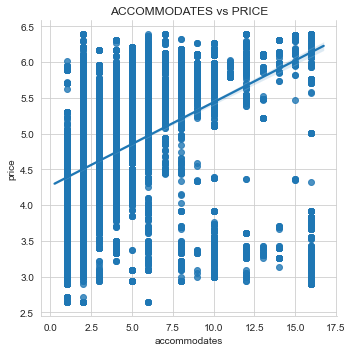

<Figure size 720x288 with 0 Axes>

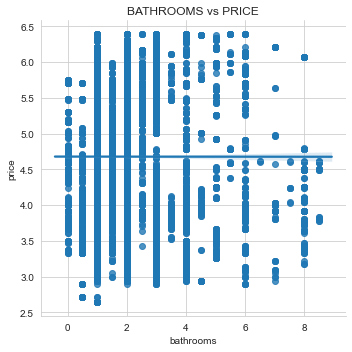

<Figure size 720x288 with 0 Axes>

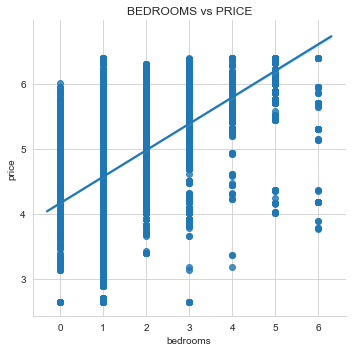

<Figure size 720x288 with 0 Axes>

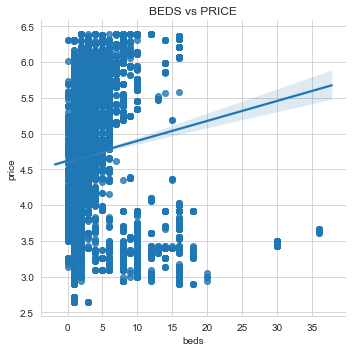

<Figure size 720x288 with 0 Axes>

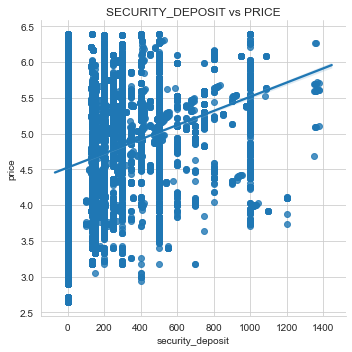

<Figure size 720x288 with 0 Axes>

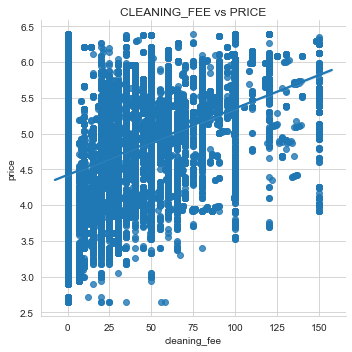

<Figure size 720x288 with 0 Axes>

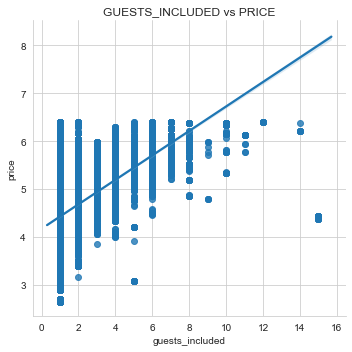

<Figure size 720x288 with 0 Axes>

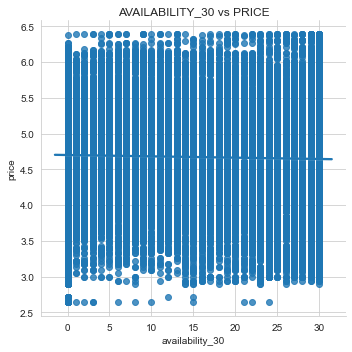

<Figure size 720x288 with 0 Axes>

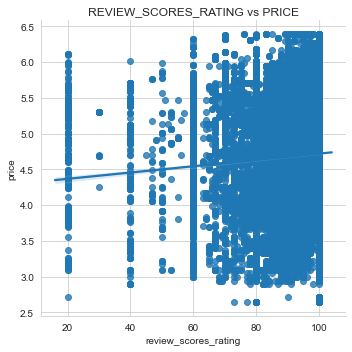

<Figure size 720x288 with 0 Axes>

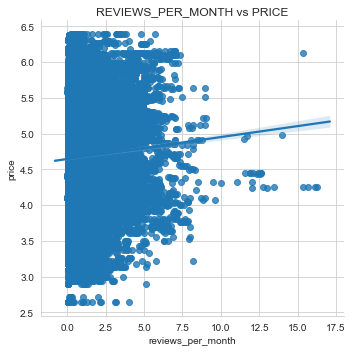

<Figure size 720x288 with 0 Axes>

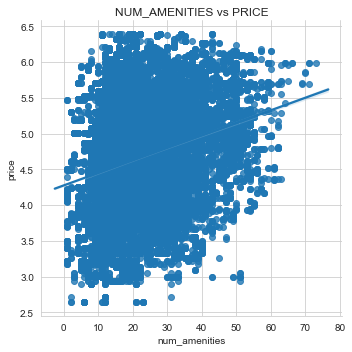

<Figure size 720x288 with 0 Axes>

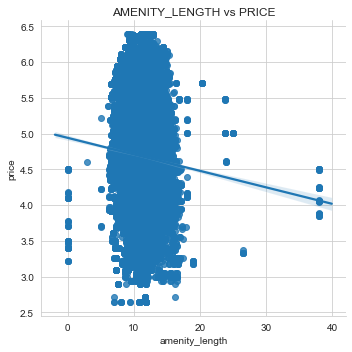

<Figure size 720x288 with 0 Axes>

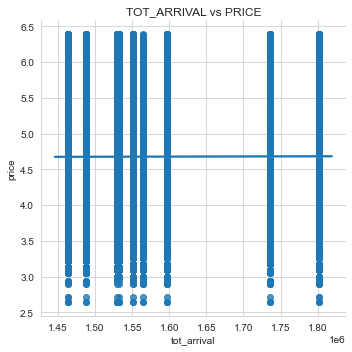

In [1168]:
for col in cols_num:
    plt.figure(figsize=(10,4))
    sns.lmplot(x=col,y='price',data=df_new)
    plt.title(str.upper(col) + ' vs PRICE')
    plt.tight_layout()